<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-02-tree-based-models-gradient-boosted-lightgbm-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 3.2 Light Gradient Boosting Machine (LightGBM)

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework that is designed to be both efficient and scalable. It is based on the gradient boosting framework and uses a tree-based learning algorithm. This tutorial will guide you through the concepts and implementation of LightGBM, including its advantages, how it works, and how to implement it in Python.


## Overview

Light Gradient Boosting Machine (LightGBM) is a high-performance, distributed, and efficient gradient boosting framework designed for speed and scalability, particularly for large-scale datasets. Developed by Microsoft, it is optimized for tasks like classification, regression, ranking, and other machine learning problems. LightGBM is part of the gradient boosting family, which builds an ensemble of weak learners (typically decision trees) to create a strong predictive model. LightGBM stands out due to its focus on computational efficiency and memory optimization, making it faster and less resource-intensive than other gradient boosting frameworks like XGBoost, especially for large datasets with high-dimensional features.


### Key Features of LightGBM

- Histogram-based learning for speed and low memory use.
- Leaf-wise tree growth for high accuracy.
- Native categorical feature support.
- Parallel and GPU training.
- Sparse data optimization.
- Custom loss functions.
- Feature importance and early stopping.

### How LightGBM Works

LightGBM (Light Gradient Boosting Machine) operates as a gradient boosting framework that builds an ensemble of decision trees iteratively to minimize a loss function. Below is an explanation of each step in the provided flowchart, including relevant equations where applicable.


1. Data Preprocessing

In the "Data Preprocessing" step, the algorithm loads the dataset, handles categorical features, and discretizes continuous features into histograms to optimize computation. This involves transforming feature values $x_j$ for feature $j$ into discrete bins $h_j(x_j)$), where the number of bins $k$ is predefined, reducing memory usage and speeding up subsequent calculations.

2. Initialize Model

Sets the initial predictions for all instances, typically starting with a constant value that minimizes the loss function. This is expressed as:

$$ \hat{y}_i^{(0)} = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

where $L$ represents the loss function (e.g., mean squared error for regression or log loss for classification), and $y_i$ is the true target value for instance $i$.

2. Compute Gradients and Hessians

Calculates the first-order (gradient) and second-order (Hessian) derivatives of the loss function with respect to the predictions. These guide the tree-building process.

Gradient:

$$ g_i^{(t)} = \frac{\partial L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}} $$
Hessain:

$$  h_i^{(t)} = \frac{\partial^2 L(y_i, \hat{y}_i^{(t-1)})}{\partial (\hat{y}_i^{(t-1)})^2} $$

These are computed for each instance $i$ at iteration $t$.

3. Apply GOSS (Gradient-based One-Side Sampling)

This step reduces the dataset size by sampling instances based on their gradient magnitudes, prioritizing those with larger gradients to focus on hard examples. The sampling probability is proportional to $p_i \propto |g_i|$, allowing the algorithm to use a subset of instances for constructing the next tree, thus improving efficiency.

::: callout-note
Gradient-based One-Side Sampling" (GOSS):

Gradient-based One-Side Sampling (GOSS) is a data subsampling method used in LightGBM. GOSS is designed to speed up the training process of gradient boosting algorithms while maintaining or improving the model's accuracy.GOSS works by first sorting the training instances according to their gradients. The instances with larger gradients are considered more important for the model, as they provide more information about the loss function
:::


4. Apply EFB (Exclusive Feature Bundling)

During the "Apply EFB (Exclusive Feature Bundling)" step, the algorithm groups mutually exclusive features into bundles to reduce dimensionality while minimizing information loss, which is particularly useful for sparse datasets. This involves combining features with no overlapping non-zero values into a single histogram, optimizing the feature space without significant loss of predictive power.

5. Build Decision Tree (Histogram-based, Leaf-wise growth)

The "Build Decision Tree (Histogram-based, Leaf-wise growth)" step constructs a decision tree using histogram-based splitting and selects the leaf with the maximum loss reduction for splitting, known as leaf-wise growth.

The optimal output for a leaf $q$ is  defined as:

$$\gamma_q = -\frac{G_q}{H_q + \lambda}$$
where $G_q = \sum_{i \in q} g_i$ is the sum of gradients, $H_q = \sum_{i \in q} h_i$ is the sum of Hessians, and $\lambda$ is a regularization parameter. The gain (loss reduction) from a split is calculated as:

$$ \text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{G_q^2}{H_q + \lambda} \right] - \gamma $$

where $L$ and $R$ denote the left and right child nodes.

6. Update Model Predictions

The algorithm incorporates the new tree's contribution into the existing predictions, refining the model iteratively. This is done using the following equation:

$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \cdot \text{tree}_t(x_i) $$
where $\eta$ is the learning rate and $\text{tree}_t(x_i)$ is the prediction from the new tree for instance $i$ at iteration $t$.

::: callout-note
Leaf-wise Growth:

"Leaf-wise" growth strategy is a tree building algorithm used in gradient boosting algorithms such as LightGBM. In this strategy, the tree is grown leaf-wise, meaning that it starts by growing the tree with a single root node, and then at each step, it selects the leaf node that yields the largest reduction in the loss function, and splits it into two child nodes
:::

7. Check Stopping Criteria

This step evaluates whether to continue training by checking if the maximum number of trees is reached or if convergence is achieved. This is determined by conditions such as $t \geq \text{max_trees}$ or $\Delta L < \epsilon$, where $\Delta L$ is the change in loss and $\epsilon$ is a small threshold, halting the process when no significant improvement is observed.

8. Output Final Model

Finally, the "Output Final Model" step combines all the trained trees to produce the final predictive model, which is the sum of contributions from each tree. The final prediction for an instance $i$ is given by:

$$ \hat{y}_i = \sum_{t=1}^T \eta \cdot \text{tree}_t(x_i)  $$

where $T$ is the total number of trees, providing the complete model for inference.

Here below is a flowchart illustrating the lightGBM workflow:


![alt text](http://drive.google.com/uc?export=view&id=197dEVzOVTfItn4SMIM-1i-bQc-QVRPNb)








### Advantages of LightGBM

It is designed to be distributed and efficient with the following advantages:

-   Faster training speed and higher efficiency.

-   Lower memory usage.

-   Better accuracy.

-   Support of parallel, distributed, and GPU learning.

-   Capable of handling large-scale data.

### Limitations of LightGBM

- Leaf-wise tree growth can lead to overfitting, especially with small datasets or insufficient regularization, as it aggressively splits nodes with the highest loss reduction.
- Histogram-based learning may reduce precision for datasets with highly skewed or sparse features, potentially losing fine-grained information.
- Requires careful tuning of hyperparameters (e.g., learning rate, max depth, and number of leaves) to achieve optimal performance, which can be time-consuming.
- May struggle with extremely noisy data or datasets with a very high number of categorical features, where feature bundling might oversimplify relationships.
- Parallel and GPU support, while advantageous, can be resource-intensive and may not always scale well on very small datasets or underconstrained hardware.

### Key Hyperparameters of LightGBM

The key hyperparameters of LightGBM that significantly influence its performance include:

- `learning_rate`: Controls the step size for each iteration, typically set between 0.01 and 0.1, where a smaller value (e.g.,  $\eta$) slows learning but may improve generalization.
- `num_leaves`: Determines the maximum number of leaves in one tree, with higher values (e.g., 31 or 127) increasing model complexity and risk of overfitting.
- `max_depth`: Limits the maximum depth of each tree, preventing overfitting by capping growth (e.g., 5-10 is common).
- `min_data_in_leaf`: Sets the minimum number of data points in a leaf, helping to avoid overfitting (e.g., 20-100 depending on dataset size).
- `feature_fraction`: Specifies the fraction of features to consider per tree (e.g., 0.8), introducing randomness to reduce overfitting.
- `bagging_fraction`: Defines the fraction of data to sample for each iteration (e.g., 0.9), aiding in reducing variance.
- `lambda_l1` and `lambda_l2`: Regularization parameters (L1 and L2) to penalize large weights, controlling model complexity (e.g., 0 to 1).
- `min_gain_to_split`: Sets the minimum gain required to split a leaf, preventing unnecessary splits (e.g., 0.01).
- `num_iterations`: Defines the total number of boosting iterations or trees to build (e.g., 100-1000), affecting training time and accuracy.

### Comparison of GBM and LightGBM


| **Aspect**              | **GBM (Gradient Boosting Machine)**         | **LightGBM**                              |
|--------------------------|---------------------------------------------|-------------------------------------------|
| `Speed and Efficiency` | Slower, less memory-efficient due to level-wise growth | Faster and memory-efficient with histogram-based learning |
| `Tree Growth Strategy` | Level-wise, grows trees layer by layer      | Leaf-wise, splits leaf with max loss reduction |
| `Scalability`          | Struggles with large datasets, sequential   | Optimized for large datasets, supports parallel/GPU training |
| `Feature Handling`     | Requires preprocessed categorical features  | Natively supports categorical features    |
| `Sampling Techniques`  | Lacks advanced sampling methods             | Uses GOSS and EFB for data/feature reduction |
| `Overfitting Control`  | More robust due to level-wise approach      | Requires tuning (e.g., min_data_in_leaf) to prevent overfitting |


## Light GBM Implementation from Scratch in Python

Implementing LightGBM from scratch in Python for classification and regression without using any external packages involves creating a simplified version of its core concepts, such as gradient boosting with histogram-based learning and leaf-wise tree growth. Below is a basic implementation focusing on the key steps: initializing a model, computing gradients and Hessians, building decision trees iteratively, and updating predictions. This example uses a simple dataset and avoids advanced features like GOSS or EFB for simplicity.

In [83]:
import warnings
warnings.filterwarnings('ignore')


### Generate Synthetic Data


This section generates synthetic data for both classification and regression tasks. The data is created using NumPy, where `X` represents the features and `y` represents the target variable.





In [1]:
# Generate synthetic data
import numpy as np
np.random.seed(123)
n = 100

# Regression data
X_reg = np.random.rand(n, 2)  # 2 features
y_reg = 2 * X_reg[:, 0] + 3 * X_reg[:, 1] + np.random.randn(n)  # Linear target with noise

# Classification data (binary)
X_class = np.random.rand(n, 2)
y_class = (2 * X_class[:, 0] + 3 * X_class[:, 1] + np.random.randn(n) > 0).astype(int)  # Binary target

### LightGBM Implementation

We will implement a simplified version of LightGBM focusing on regression tasks. The implementation includes functions to compute gradients and Hessians, build decision trees, and update predictions iteratively.




**Parameters:**  

`n_trees = 10`, `learning_rate = 0.1`, `max_depth = 3`, `min_data_in_leaf = 5`.

The `build_tree` function recursively constructs a decision tree.  
- If `depth == 0` or the number of gradients (or data points) in the node is ≤ `min_data_in_leaf`, it returns:  
  $$
  \frac{\text{mean(grad)}}{\text{mean(hess)} + 10^{-10}}
  $$
- Otherwise, it selects the first feature and uses its median as the split threshold.
- It checks that both resulting splits have at least `min_data_in_leaf` samples.
- If valid, it recursively builds the left and right subtrees.
- Returns a node represented as a list containing: predicted value, threshold, feature index, and left/right subtrees.

The `update_prediction` function:  
- If the current node is a leaf (numeric value), returns the leaf value multiplied by `learning_rate`.
- Otherwise, compares the input feature value $ x[\text{tree.feature}] $ with `tree.threshold`.
- Recursively calls `update_prediction` on `tree.left` or `tree.right` based on the comparison.

In [2]:
# Parameters
n_trees = 10
learning_rate = 0.1
max_depth = 3
min_data_in_leaf = 5

# Function to build a simple decision tree
def build_tree(X, grad, hess, depth, min_data):
    if depth == 0 or len(grad) <= min_data:
        return np.mean(grad) / (np.mean(hess) + 1e-10)  # Leaf value

    feature_idx = 0 # Use the first feature
    threshold = np.median(X[:, feature_idx])
    left_idx = np.where(X[:, feature_idx] <= threshold)[0]
    right_idx = np.where(X[:, feature_idx] > threshold)[0]

    if len(left_idx) < min_data or len(right_idx) < min_data:
        return np.mean(grad) / (np.mean(hess) + 1e-10)

    left_value = build_tree(X[left_idx, :], grad[left_idx], hess[left_idx], depth - 1, min_data)
    right_value = build_tree(X[right_idx, :], grad[right_idx], hess[right_idx], depth - 1, min_data)

    return {'left': left_value, 'right': right_value, 'threshold': threshold, 'feature': feature_idx}

# Function to update predictions
def update_prediction(x, tree):
    if isinstance(tree, (int, float)):
        return tree * learning_rate
    if x[tree['feature']] <= tree['threshold']:
        return update_prediction(x, tree['left'])
    else:
        return update_prediction(x, tree['right'])

#### Regression and Classification Implementation

Prededictions are updated iteratively by adding the output of the newly built tree to the current predictions, scaled by the learning rate. This process is repeated for `n_trees` iterations, gradually refining the model's predictions.ictions are updated iteratively by adding the output of the newly built tree to the current predictions, scaled by the learning rate. This process is repeated for `n_trees` iterations, gradually refining the model's predictions.

In [3]:
# Regression Implementation
predictions_reg = np.full(n, np.mean(y_reg))
for t in range(n_trees):
  gradients = y_reg - predictions_reg  # Gradient for squared error
  hessians = np.ones(n)  # Hessian for squared error
  tree = build_tree(X_reg, gradients, hessians, max_depth, min_data_in_leaf)
  for i in range(n):
    predictions_reg[i] = predictions_reg[i] + update_prediction(X_reg[i, :], tree)


# Classification Implementation
predictions_class = np.zeros(n)  # Initial log-odds (can start at 0)
for t in range(n_trees):
  # Logistic loss gradient and Hessian
  p = 1 / (1 + np.exp(-predictions_class))  # Sigmoid
  gradients = p - y_class  # Gradient for log loss
  hessians = p * (1 - p)  # Hessian for log loss
  tree = build_tree(X_class, gradients, hessians, max_depth, min_data_in_leaf)
  for i in range(n):
    predictions_class[i] = predictions_class[i] + update_prediction(X_class[i, :], tree)


# Output results
print("Regression Predictions:")
print(predictions_reg[:6])
print("\nClassification Predictions (Log-Odds):")
print(predictions_class[:6])
print("\nClassification Probabilities:")
print(1 / (1 + np.exp(-predictions_class[:6])))  # Convert to probabilities

Regression Predictions:
[3.25790473 1.90707431 2.50924032 3.21484025 2.13464193 2.25205466]

Classification Predictions (Log-Odds):
[-701.96409818 -701.96409818   -8.47748064 -701.96409818   -3.36424629
 -701.96409818]

Classification Probabilities:
[1.38313849e-305 1.38313849e-305 2.08059031e-004 1.38313849e-305
 3.34317364e-002 1.38313849e-305]


####  Prediction Evaluation



In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, log_loss

# Regression Metrics
mse = mean_squared_error(y_reg, predictions_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg, predictions_reg)

# Classification Metrics
pred_prob = 1 / (1 + np.exp(-predictions_class))  # Convert log-odds to probabilities
predicted_class = (pred_prob >= 0.5).astype(int)  # Threshold at 0.5
accuracy = accuracy_score(y_class, predicted_class)

# Log Loss
logloss = log_loss(y_class, pred_prob)


# Print Results
print("Regression Evaluation:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print("\nClassification Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")

Regression Evaluation:
MSE: 1.4251
RMSE: 1.1938
MAE: 0.9726

Classification Evaluation:
Accuracy: 0.0500
Log Loss: 24.3926


## Light Gradient Boosting Machine (lightGBM) in Python

LightGBM (Light Gradient Boosting Machine) is a high-performance, open-source gradient boosting framework designed for speed, efficiency, and scalability in machine learning tasks. Built by Microsoft, it is particularly suited for large datasets and supports tasks like classification, regression, and ranking. Its optimized algorithms and support for parallel and GPU computing make it a popular choice for data scientists.

**Key Features of LightGBM**

1. **High Performance**: Uses histogram-based algorithms and leaf-wise tree growth for faster training and lower memory usage.
2. **Scalability**: Handles large datasets and high-dimensional data efficiently with support for distributed and GPU training.
3. **Native Categorical Feature Support**: Directly processes categorical features without one-hot encoding, improving speed and memory usage.
4. **Flexible Objectives**: Supports various tasks, including binary/multiclass classification, regression, ranking, and custom loss functions.
5. **Scikit-learn Compatibility**: Offers a scikit-learn API (`LGBMClassifier`, `LGBMRegressor`) for seamless integration with existing workflows.
6. **Early Stopping**: Stops training when validation performance plateaus, saving time and preventing overfitting.
7. **Feature Importance**: Provides tools to analyze feature contributions, aiding model interpretation.
8. **Cross-Platform**: Available on Windows, Linux, and macOS, with easy installation via pip (`pip install lightgbm`).

The difference between `lgb.LGBMRegressor` and `lgb.train` in the LightGBM library lies in their interfaces, flexibility, and use cases. Both are used to train LightGBM models, but they cater to different needs and workflows. Below is a brief comparison:


- **`lgb.LGBMRegressor`**:
  - Part of LightGBM's **scikit-learn-compatible API**, designed to integrate seamlessly with scikit-learn's ecosystem.
  - Provides a high-level, user-friendly interface that follows the scikit-learn `fit`/`predict` paradigm.
  - Ideal for users who want to leverage scikit-learn tools like `GridSearchCV`, `RandomizedSearchCV`, or pipelines for model training, cross-validation, and hyperparameter tuning.
  - Automatically handles data conversion to LightGBM's internal format (`Dataset`) behind the scenes.
  - Example:
    ```python
    import lightgbm as lgb
    model = lgb.LGBMRegressor(objective='regression', learning_rate=0.05)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ```

- **`lgb.train`**:
  - Part of LightGBM's **native API**, offering a lower-level, more customizable interface.
  - Requires explicit creation of `lgb.Dataset` objects for training and validation data.
  - Provides fine-grained control over the training process, such as custom callbacks, early stopping, and custom evaluation metrics.
  - Preferred for advanced use cases where you need to customize the training loop or use LightGBM-specific features not exposed in the scikit-learn API.
  - Example:
    ```python
    import lightgbm as lgb
    train_data = lgb.Dataset(X_train, label=y_train)
    params = {'objective': 'regression', 'learning_rate': 0.05}
    model = lgb.train(params, train_data, num_boost_round=100)
    y_pred = model.predict(X_test)
    ```



In [ ]:
!pip install lightgbm

In [51]:
# Import necessary libraries
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Regression Example

Here below is an example of using LightGBM for regression tasks in Python. This example demonstrates how to create a synthetic dataset, train a LightGBM regressor, and evaluate its performance. We also show cross-validation to assess the model's robustness and hyperparameter tuning for optimal performance.



#### Data and Data Preparation

We will use california housing dataset from sklearn. This dataset contains information about various features of houses in California, such as median income, house age, average rooms, and more. The target variable is the median house value.




In [52]:
# Load California Housing data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load California Housing data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Set random seed for reproducibility
np.random.seed(123)

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Fit lightGBM model with `lgb.train`

Next, we'll fit the light model by using the `lgb.train()` function, which displays the training and testing RMSE (root mean squared error) for each round of boosting


In [84]:

# Load train and test data into LightGBM dataset object
train_lgb = lgb.Dataset(data = X_train_scaled, label = y_train)
test_lgb = lgb.Dataset(data = X_test_scaled, label = y_test, reference=train_lgb)


# Define initial parameters
params = {
    "objective": "regression",
    "metric": "l2",
    "min_data_in_leaf": 1,
    "learning_rate": 0.05,
    "num_threads": 2,
}

# Lists to store training and validation loss
train_loss = []
val_loss = []

# Callback to store metrics
def log_evaluation(train_loss, val_loss):
    def callback(env):
        # Access evaluation results from evaluation_result_list
        if env.evaluation_result_list:
            for eval_result in env.evaluation_result_list:
                if eval_result[0] == 'train' and eval_result[1] == 'l2':
                    train_loss.append(eval_result[2])
                elif eval_result[0] == 'valid_1' and eval_result[1] == 'l2':
                    val_loss.append(eval_result[2])
    return callback


# Fit initial LightGBM model
lightgbm_model = lgb.train(
    params,
    train_lgb,
    num_boost_round=100,
    valid_sets=[train_lgb, test_lgb],
    callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True), log_evaluation(train_loss, val_loss)]
)


[LightGBM] [Fatal] Length of labels differs from the length of #data


LightGBMError: Length of labels differs from the length of #data

In [54]:
print(lightgbm_model.params)

{'objective': 'regression', 'metric': 'l2', 'min_data_in_leaf': 1, 'learning_rate': 0.05, 'num_threads': 2, 'num_iterations': 100}


#### Cross-validation with K-Fold

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=101)
cv_l2_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    X_train_fold, X_val_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    train_lgb_fold = lgb.Dataset(data=X_train_fold, label=y_train_fold)
    val_lgb_fold = lgb.Dataset(data=X_val_fold, label=y_val_fold, reference=train_lgb_fold)

    model_fold = lgb.train(
        params,
        train_lgb_fold,
        num_boost_round=100,
        valid_sets=[train_lgb_fold, val_lgb_fold],
        callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True)]
    )

    y_pred_fold = model_fold.predict(X_val_fold)
    l2_fold = mean_squared_error(y_val_fold, y_pred_fold)
    cv_l2_scores.append(l2_fold)



In [56]:
print(f"Cross-validation L2 score: {np.mean(cv_l2_scores):.4f} ± {np.std(cv_l2_scores):.4f}")

Cross-validation L2 score: 0.2357 ± 0.0150


#### Predict and Evaluate Initial Model

Test Set MSE: 0.2646
Test Set R²: 0.8045


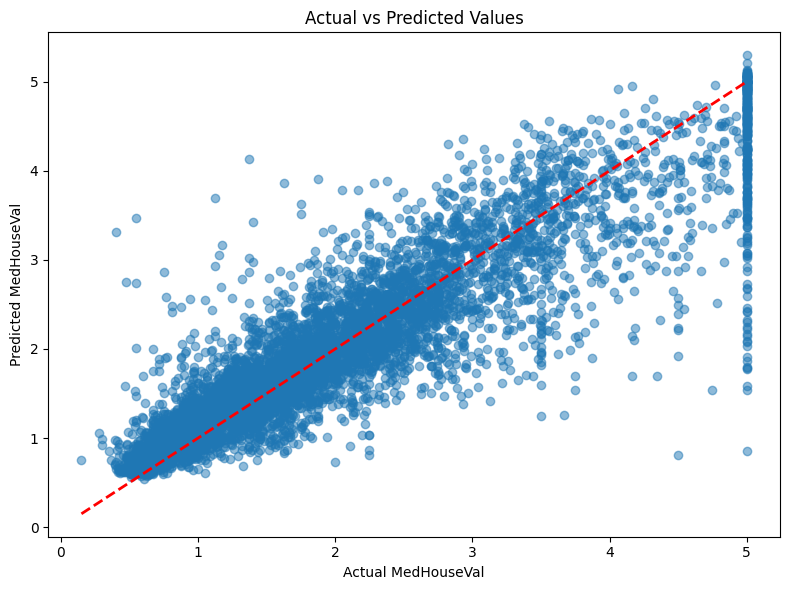

In [20]:
# Prediction and Evaluation
y_pred = lightgbm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set MSE: {mse:.4f}")
print(f"Test Set R²: {r2:.4f}")

# 1:1 Plot (Predicted vs Actual)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

#### Feature Importnace

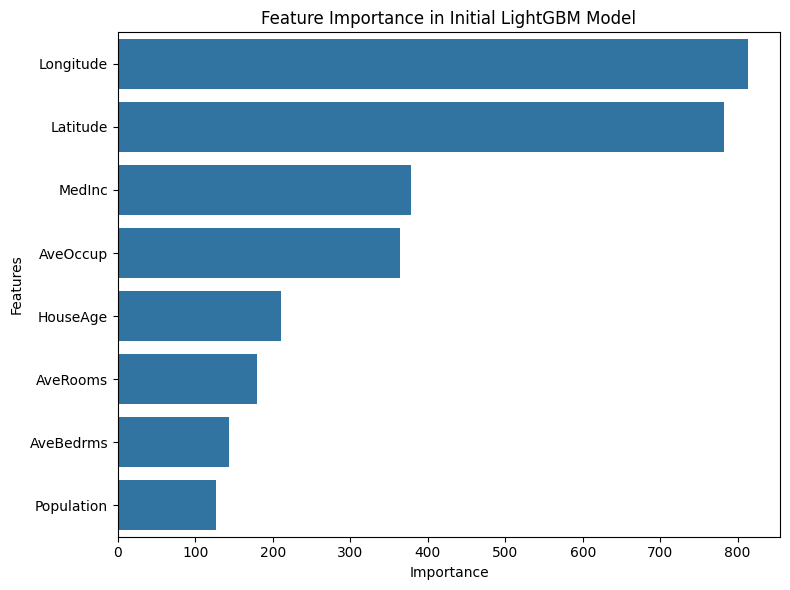

In [22]:
# Feature Importance for Initial Model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lightgbm_model.feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Initial LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### Fit lightGBM model with `lgb.LGBMRegressor`

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.065100


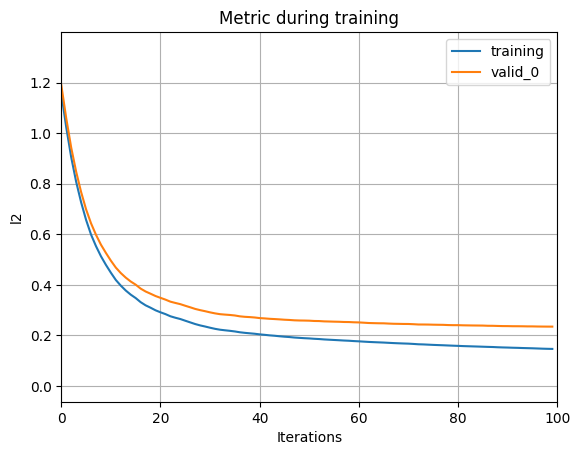

In [15]:
model = lgb.LGBMRegressor(objective='mse', seed=8798, num_threads=1)
model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test), (X_train_scaled, y_train)])

lgb.plot_metric(model.evals_result_)
plt.show()

### Hyperparameter Tuning with Grid Search

In this section, we will perform hyperparameter tuning using Grid Search to find the optimal parameters for our LightGBM model. We will use `RandomizedSearchCV` from scikit-learn to systematically explore combinations of hyperparameters and evaluate their performance using cross-validation.

In [61]:
# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, -1],
    'min_data_in_leaf': [10, 20]
}

lgb_reg = lgb.LGBMRegressor(objective='regression', metric='l2', num_threads=2)
random_search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=101,
    n_jobs=2
)
random_search.fit(X_train_scaled, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 8
[LightGBM] [Info] Start training from score 2.066732
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM

RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(metric='l2', num_threads=2,
                                           objective='regression'),
                   n_jobs=2,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 7, -1],
                                        'min_data_in_leaf': [10, 20],
                                        'num_leaves': [20, 31, 50]},
                   random_state=101, scoring='neg_mean_squared_error')

In [62]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation MSE:", -random_search.best_score_)

Best Parameters: {'num_leaves': 20, 'min_data_in_leaf': 20, 'max_depth': 7, 'learning_rate': 0.1}
Best Cross-validation MSE: 0.22459263519309353


#### Fit model with best parameters

In [63]:
# Fit model with best parameters
best_params = random_search.best_params_
best_params.update({"objective": "regression", "metric": "l2", "num_threads": 2})
final_model = lgb.train(
    best_params,
    train_lgb,
    num_boost_round=100,
    valid_sets=[train_lgb, test_lgb],
    callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True)]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.065100
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[100]	training's l2: 0.178276	valid_1's l2: 0.249855


#### Prediction and Evaluation with Final Model

In [66]:
# Predict and Evaluate Final Model
final_predictions = final_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print("\nFinal GBM Model Performance:")
print(f"  Mean Squared Error (MSE): {final_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {final_rmse:.4f}")
print(f"  R-squared (R2): {final_r2:.4f}")


Final GBM Model Performance:
  Mean Squared Error (MSE): 0.2499
  Root Mean Squared Error (RMSE): 0.4999
  R-squared (R2): 0.8154


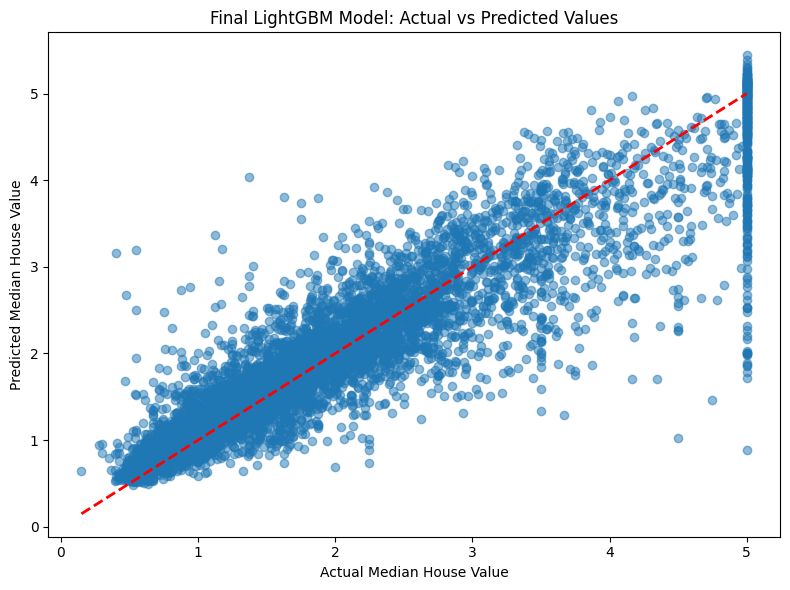

In [68]:
# 1:1 Plot for Initial Model
import matplotlib.pyplot as plt
import seaborn as sns

# 1:1 Plot for Final Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Final LightGBM Model: Actual vs Predicted Values")
plt.tight_layout()
plt.show()

##### Feature Importance

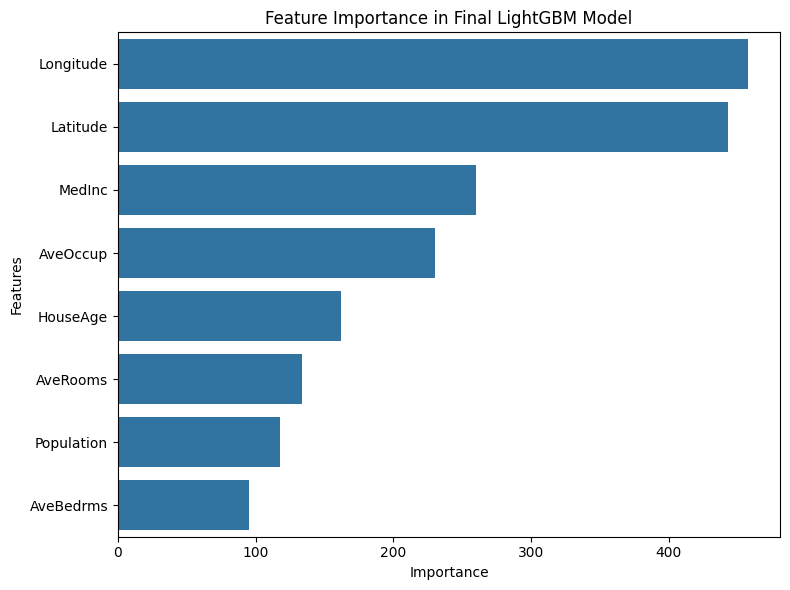

In [65]:
# Feature Importance for Final Model
final_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=final_feature_importance)
plt.title('Feature Importance in Final LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Classification with LightGBM

In this section, we will use the {lightGBM} package to perform classification on a `health_insurance` dataset. We will load the dataset, preprocess it, and then fit an lightgbm model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and confusion matrix. We will also visualize the feature importance to understand which features contribute most to the model's predictions by lightGBM with the best parameters.

In [39]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [70]:
# Load the dataset

df = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")

# Create subset with specified variables
df = df[['product', 'age', 'household', 'position_level', 'absent', 'gender']].copy()

# Encode target variable (product: A=0, B=1, C=2)
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])

# Create dummy variables for gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Create training and test datasets
np.random.seed(123)
X = df.drop('product', axis=1)
y = df['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)


# Load train and test data into LightGBM dataset objects
train_lgb = lgb.Dataset(data = X_train, label = y_train)
test_lgb = lgb.Dataset(data = X_test, label = y_test, reference=train_lgb)

#### Fit lightGBM Classification Model

In [71]:
# Fit initial model with fixed parameters

initial_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "num_class": 3,
    "num_leaves": 50,  # Increased
    "learning_rate": 0.05,
    "max_depth": 7,  # Increased
    "min_data_in_leaf": 5,  # Decreased
    "num_threads": 2,
    "seed": 123,
    "min_gain_to_split": 0.01  # Added
}

train_loss = []
val_loss = []

def log_evaluation(train_loss, val_loss):
    def callback(env):
        if env.evaluation_result_list:
            for eval_result in env.evaluation_result_list:
                if eval_result[0] == 'train' and eval_result[1] == 'multi_logloss':
                    train_loss.append(eval_result[2])
                elif eval_result[0] == 'valid_1' and eval_result[1] == 'multi_logloss':
                    val_loss.append(eval_result[2])
    return callback

initial_model = lgb.train(
    initial_params,
    train_lgb,
    num_boost_round=200,  # Increased
    valid_sets=[train_lgb, test_lgb],
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), log_evaluation(train_loss, val_loss)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1086, number of used features: 5
[LightGBM] [Info] Start training from score -1.076753
[LightGBM] [Info] Start training from score -1.152526
[LightGBM] [Info] Start training from score -1.068678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [72]:
print(initial_model.params)

{'objective': 'multiclass', 'metric': 'multi_logloss', 'num_class': 3, 'num_leaves': 50, 'learning_rate': 0.05, 'max_depth': 7, 'min_data_in_leaf': 5, 'num_threads': 2, 'seed': 123, 'min_gain_to_split': 0.01, 'num_iterations': 200}


#### Cross-validation with K-Fold

In [ ]:
cv_results = lgb.cv(
    initial_params,
    train_lgb,
    num_boost_round=200,
    nfold=5,
    metrics='multi_logloss',
    stratified=True,
    seed=123,
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)


In [73]:
print(f"\nCross-validation Log Loss: {min(cv_results['valid multi_logloss-mean']):.6f} ± "
      f"{cv_results['valid multi_logloss-stdv'][np.argmin(cv_results['valid multi_logloss-mean'])]:.6f}")


Cross-validation Log Loss: 0.446897 ± 0.061668


#### Predictions and Evaluation



In [74]:
# Predictions and evaluation for initial model
yhat_train = initial_model.predict(X_train)
yhat_test = initial_model.predict(X_test)
yhat_train_pred = np.argmax(yhat_train, axis=1)
yhat_test_pred = np.argmax(yhat_test, axis=1)

# Calculate accuracy and log loss
accuracy_train_initial = accuracy_score(y_train, yhat_train_pred)
accuracy_test_initial = accuracy_score(y_test, yhat_test_pred)
logloss_train_initial = log_loss(y_train, yhat_train)
logloss_test_initial = log_loss(y_test, yhat_test)

# Output results
print("\nInitial Model Performance:")
print(f"Training Accuracy: {accuracy_train_initial:.6f}")
print(f"Test Accuracy: {accuracy_test_initial:.6f}")
print(f"Training Log Loss: {logloss_train_initial:.6f}")
print(f"Test Log Loss: {logloss_test_initial:.6f}")


Initial Model Performance:
Training Accuracy: 0.943831
Test Accuracy: 0.817680
Training Log Loss: 0.195927
Test Log Loss: 0.397130


#### Feature Importance



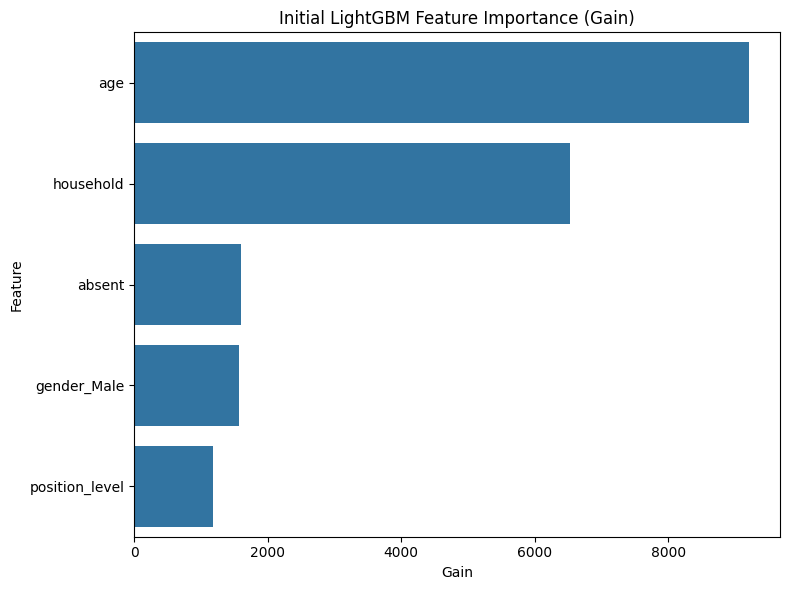

In [75]:
# Feature importance for initial model
importance_initial = initial_model.feature_importance(importance_type='gain')
feature_names = X_train.columns

importance_initial_df = pd.DataFrame({'Feature': feature_names, 'Gain': importance_initial})
importance_initial_df = importance_initial_df.sort_values(by='Gain', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Gain', y='Feature', data=importance_initial_df, color='#1f77b4')
plt.title("Initial LightGBM Feature Importance (Gain)")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning for the Best Parameters

To find the best parameters for the LightGBM classification model, we will perform a grid search over key hyperparameters (`num_leaves`, `learning_rate`, `max_depth`, `min_data_in_leaf`) using 5-fold cross-validation. This will help us optimize the multi-class log loss metric.

##### Define Parameter Grid and Initialize Variables

In [ ]:
%%capture
# Hyperparameter Tuning with RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [7, 10, -1],
    'min_data_in_leaf': [1, 5, 10]
}

lgb_clf = lgb.LGBMClassifier(
    objective='multiclass', num_class=3, metric='multi_logloss',
    num_threads=2, seed=123, is_unbalance=True
)
random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_log_loss',
    cv=5,
    random_state=123,
    n_jobs=2
)
random_search.fit(X_train, y_train)



[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 868, number of used features: 5
[LightGBM] [Info] Start training from score -1.075832
[LightGBM] [Info] Start training from score -1.153064
[LightGBM] [Info] Start training from score -1.069098
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] No further splits with positive gain, best ga

In [77]:
print("\nBest Parameters:", random_search.best_params_)
print(f"Best Cross-validation Log Loss: {-random_search.best_score_:.6f}")


Best Parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_depth': 7, 'learning_rate': 0.05}
Best Cross-validation Log Loss: 0.454438


##### The Best Parameters

In [78]:
# The Best Parameters
print("\nBest Parameters:", random_search.best_params_)


Best Parameters: {'num_leaves': 50, 'min_data_in_leaf': 5, 'max_depth': 7, 'learning_rate': 0.05}


##### Train and Validate Model with Best Parameters

In [80]:
%%capture
# Fit Final Model with Best Parameters
best_params = random_search.best_params_
best_params.update({"objective": "multiclass", "metric": "multi_logloss", "num_class": 3, "num_threads": 2, "seed": 123})

train_loss = []
val_loss = []

final_model = lgb.train(
    best_params,
    train_lgb,
    num_boost_round=200,
    valid_sets=[train_lgb, test_lgb],
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), log_evaluation(train_loss, val_loss)]
)

##### Predictions and Evaluation for Final Model

In [49]:
# Predictions and evaluation for final model
yhat_train_final = final_model.predict(X_train)
yhat_test_final = final_model.predict(X_test)
yhat_train_pred_final = np.argmax(yhat_train_final, axis=1)
yhat_test_pred_final = np.argmax(yhat_test_final, axis=1)

accuracy_train_final = accuracy_score(y_train, yhat_train_pred_final)
accuracy_test_final = accuracy_score(y_test, yhat_test_pred_final)
logloss_train_final = log_loss(y_train, yhat_train_final)
logloss_test_final = log_loss(y_test, yhat_test_final)

print("\nFinal Model Performance:")
print(f"Training Accuracy: {accuracy_train_final:.6f}")
print(f"Test Accuracy: {accuracy_test_final:.6f}")
print(f"Training Log Loss: {logloss_train_final:.6f}")
print(f"Test Log Loss: {logloss_test_final:.6f}")


Final Model Performance:
Training Accuracy: 0.935543
Test Accuracy: 0.812155
Training Log Loss: 0.227182
Test Log Loss: 0.397528


##### Variable Importance for Final Model

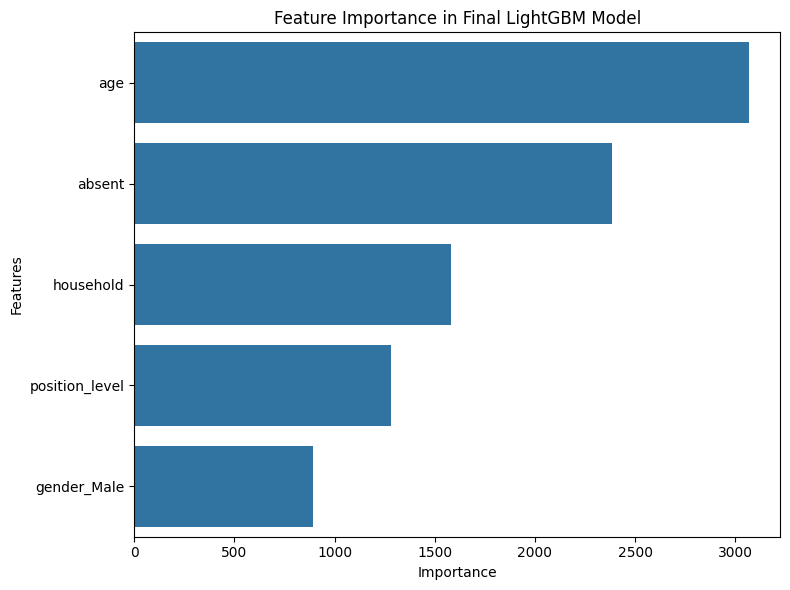

In [50]:
# Variable Importance for Final Model
final_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=final_feature_importance)
plt.title('Feature Importance in Final LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Summary and Conclusion

This notebook provides a comprehensive overview and practical implementation of Light Gradient Boosting Machine (LightGBM) in Python. It begins by explaining the core concepts, key features, advantages, and limitations of LightGBM, including its histogram-based learning, leaf-wise tree growth, GOSS, and EFB techniques. A simple implementation of LightGBM from scratch is also presented to illustrate its fundamental workings.

The notebook then demonstrates the application of LightGBM to both regression and classification tasks using real-world datasets: the California Housing dataset for regression and a health insurance dataset for classification. For each task, the process includes data preparation, training an initial LightGBM model, evaluating its performance, and importantly, performing hyperparameter tuning using GridSearchCV with cross-validation to find the optimal parameters. The final models are then trained with the best parameters and evaluated again to show the improvement in performance. Feature importance is also visualized for both the initial and final models to understand the contribution of different features.

In conclusion, LightGBM is a powerful and efficient gradient boosting framework that excels in handling large datasets. While it offers significant speed and memory advantages over traditional GBM and even XGBoost, particularly its leaf-wise growth can lead to overfitting if not properly regularized. The practical examples in this notebook highlight the importance of hyperparameter tuning to achieve optimal performance and demonstrate how LightGBM can be effectively applied to solve both regression and classification problems.

## References

1.  **Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection*. CRC Press.**
    -   Covers gradient boosting and LightGBM applications in R.
    -   [Amazon](https://www.amazon.com/Feature-Engineering-Selection-Practical-Predictive/dp/1138079227)
2.  **Hastie, T., et al. (2009). *The Elements of Statistical Learning* (2nd ed.). Springer.**
    -   Explains boosting theory behind LightGBM.
    -   [Free PDF](https://web.stanford.edu/~hastie/ElemStatLearn/)
3.  **Boehmke, B., & Greenwell, B. (2019). *Hands-On Machine Learning with R*. CRC Press.**
    -   Practical LightGBM tutorials in R.
    -   [CRC Press](https://www.crcpress.com/Hands-On-Machine-Learning-with-R/Boehmke-Greenwell/p/book/9781138495685)


4. [LightGBM Documentation](https://lightgbm.readthedocs.io/)

1.  **Ke, G., et al. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. *NeurIPS*.**
    -   Introduces LightGBM’s algorithms (GOSS, EFB).
    -   [arXiv](https://arxiv.org/abs/1711.04289)
2.  **Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. *Annals of Statistics*.**
    -   Foundational gradient boosting theory.
    -   [Stanford](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)
3.  **Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *KDD*.**
    -   Context for LightGBM’s improvements over XGBoost.
    -   [arXiv](https://arxiv.org/abs/1603.02754)



